In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
import matplotlib.pyplot as plt



## Data Wrangling AirBnB Dataset

In [2]:
airbnbUnclean1 = pd.read_csv("/content/airbnb_listings_austin-1.csv")
#airbnbUnclean1 = pd.read_csv("C:\\Users\\13369\\Desktop\\ML Final Project\\airbnb_listings_austin-1.csv")
#airbnbUnclean1.head()



In [3]:
airbnbUnclean1.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

In [4]:
#Remove any duplicate values based on id
airbnbUnclean1 = airbnbUnclean1.drop_duplicates(subset='id', keep='first')
airbnbUnclean1

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,6063670,https://www.airbnb.com/rooms/6063670,Austin's Downtown Garden Suite,Enjoy being literally steps from everything th...,If you are looking for the perfect suite in th...,Enjoy being literally steps from everything th...,none,I love that the downtown neighborhood is so vi...,If you are interested in hosting an even large...,In addition to the Airport Flyer that I alread...,...,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,strict
5831,8422925,https://www.airbnb.com/rooms/8422925,Two beds in Downtown Austin!,Prime location for the Austin Convention Cente...,"Located in the heart of downtown, this room co...",Prime location for the Austin Convention Cente...,none,This truly is in the middle of everything goin...,NaN,Buses leave from across the street (including ...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
5832,3345881,https://www.airbnb.com/rooms/3345881,Casa Romántica en Picos de Europa,Axtur: Picos de Europa. Desfiladero del Sella ...,Una casa excepcional en un paisaje excepcional...,Una casa excepcional en un paisaje excepcional...,none,"Pueblecito asturiano, con muy pocos vecinos, d...",Paisaje y tranquilidad.,En Coche,...,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t,strict
5833,8954997,https://www.airbnb.com/rooms/8954997,Living room with bed,Living room with bed have bathroom.,NaN,Living room with bed have bathroom.,none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible


In [5]:
#Percentages of all the missing values per column for the entire dataset
missing_value_percentages = airbnbUnclean1.isna().sum()  / len(airbnbUnclean1) *100
missing_value_percentages

,0
id,0.000000
listing_url,0.000000
name,0.000000
summary,7.917738
space,23.307626
description,0.051414
experiences_offered,0.000000
neighborhood_overview,38.783205
notes,58.697515
transit,40.154242


## For the two business questions we have selected we wrangled the data differently for each. The following is for the first question:
### Question 1: What are the key factors driving the nightly rental price for units in the Austin area?

In [6]:
#Dropped Columns with more than 20% missing data
airbnbUnclean1.drop(columns = ['space', 'neighborhood_overview', 'notes', 'transit' , 'host_about', 'host_response_time', 'host_response_rate',
                            'square_feet', 'weekly_price', 'security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy',
                            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                            'review_scores_value'], inplace = True)
airbnbUnclean1

,id,listing_url,name,summary,description,experiences_offered,host_id,host_name,host_since,host_location,...,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,Conveniently located 10-15 from downtown in SW...,none,377044,Jason & Marcie,2/4/2011,"Austin, Texas, United States",...,$0.00,2,t,0,0,0,240,1,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rent this cool concept trailer that has everyt...,none,27922117,Michael,2/17/2015,"Austin, Texas, United States",...,$0.00,3,t,29,59,89,364,0,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...","Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,46230038,Ric,10/10/2015,"Austin, Texas, United States",...,$0.00,1,t,30,60,90,365,0,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...","Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,46230038,Ric,10/10/2015,"Austin, Texas, United States",...,$0.00,1,t,30,60,90,365,0,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Brand-new 3BR/2BA Austin home with landscaped ...,none,31148752,Bo,4/13/2015,US,...,$0.00,2,t,27,57,87,358,0,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,6063670,https://www.airbnb.com/rooms/6063670,Austin's Downtown Garden Suite,Enjoy being literally steps from everything th...,Enjoy being literally steps from everything th...,none,4929310,Ryan,2/1/2013,"Austin, Texas, United States",...,$50.00,1,t,15,45,65,340,9,f,strict
5831,8422925,https://www.airbnb.com/rooms/8422925,Two beds in Downtown Austin!,Prime location for the Austin Convention Cente...,Prime location for the Austin Convention Cente...,none,44295408,Raul And Zac,9/15/2015,"Ventura, California, United States",...,$5.00,2,t,11,36,62,316,0,f,moderate
5832,3345881,https://www.airbnb.com/rooms/3345881,Casa Romántica en Picos de Europa,Axtur: Picos de Europa. Desfiladero del Sella ...,Una casa excepcional en un paisaje excepcional...,none,14869844,Ramon,4/29/2014,Asturias. Spain,...,$22.00,2,t,29,59,89,364,1,t,strict
5833,8954997,https://www.airbnb.com/rooms/8954997,Living room with bed,Living room with bed have bathroom.,Living room with bed have bathroom.,none,42870454,Kalyan,8/29/2015,"Austin, Texas, United States",...,$0.00,1,t,30,60,90,365,0,f,flexible


In [7]:
airbnbUnclean1.columns

Index(['id', 'listing_url', 'name', 'summary', 'description',
       'experiences_offered', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [8]:
#Dropping irrelevant columns for accomplishing business problems and did not have numerical values
airbnbUnclean1.drop(columns = ['host_id', 'host_name', 'host_since',
       'host_location', 'host_is_superhost', 'host_listings_count','experiences_offered',
       'host_has_profile_pic', 'host_identity_verified', 'id', 'listing_url',
       'name', 'summary', 'description', 'neighbourhood', 'cancellation_policy',
       'instant_bookable', 'bed_type', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'availability_365' ,
       'extra_people', 'city', 'amenities', 'number_of_reviews'], inplace = True)
airbnbUnclean1

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights
0,House,Private room,6,2.5,1.0,3.0,$300.00,1,2
1,Camper/RV,Private room,2,0.0,1.0,1.0,$99.00,1,3
2,House,Private room,2,1.5,1.0,1.0,$100.00,1,1
3,House,Private room,2,1.5,1.0,1.0,$100.00,1,1
4,House,Entire home/apt,6,2.0,3.0,3.0,$599.00,1,2
...,...,...,...,...,...,...,...,...,...
5830,Apartment,Entire home/apt,4,1.0,1.0,2.0,$179.00,3,1
5831,Condominium,Private room,2,1.0,1.0,2.0,$85.00,1,2
5832,House,Entire home/apt,2,1.0,0.0,1.0,$66.00,1,2
5833,Apartment,Shared room,1,1.0,1.0,1.0,$25.00,1,1


In [9]:
airbnbUnclean1.columns

Index(['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'minimum_nights'],
      dtype='object')

In [10]:
# Check for missing values in independent variables (X)
#print(X.isnull().sum())

# Check for missing or infinite values in the dependent variable (y)
#print(y.isnull().sum())
#print(np.isinf(y).sum())

In [11]:
# Step 1: Clean 'price' column (remove dollar signs, convert to numeric)
airbnbUnclean1['price'] = airbnbUnclean1['price'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['price'] = pd.to_numeric(airbnbUnclean1['price'], errors='coerce')

# Clean 'guests_included' column (remove dollar signs, convert to numeric)
airbnbUnclean1['guests_included'] = airbnbUnclean1['guests_included'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['guests_included'] = pd.to_numeric(airbnbUnclean1['guests_included'], errors='coerce')


# Step 2: Handle missing values in 'price' and independent variables
airbnbUnclean1 = airbnbUnclean1.dropna(subset=['price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'guests_included'])

# Step 3: Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[[ 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'guests_included']]

# Step 4: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=[ 'room_type'], drop_first=True, dtype='float')

# Step 5: Add constant for intercept in regression model
X = sm.add_constant(X)

# Step 6: Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

# Step 7: Perform the OLS regression (Linear Regression with dummy variables)
linear_reg = sm.OLS(y, X).fit()

# Step 8: Display the regression summary
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     453.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -41485.
No. Observations:                5781   AIC:                         8.299e+04
Df Residuals:                    5772   BIC:                         8.305e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -124

In [12]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                 Variable       VIF
0                   const  8.179648
1            accommodates  4.439488
2               bathrooms  2.460474
3                bedrooms  4.133860
4                    beds  3.705605
5          minimum_nights  1.005725
6         guests_included  1.252549
7  room_type_Private room  1.341303
8   room_type_Shared room  1.046581


In [13]:
# Step 1: Clean 'price' column (remove dollar signs, convert to numeric)
airbnbUnclean1['price'] = airbnbUnclean1['price'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['price'] = pd.to_numeric(airbnbUnclean1['price'], errors='coerce')

# Clean 'guests_included' column (remove dollar signs, convert to numeric)
airbnbUnclean1['guests_included'] = airbnbUnclean1['guests_included'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['guests_included'] = pd.to_numeric(airbnbUnclean1['guests_included'], errors='coerce')


# Step 2: Handle missing values in 'price' and independent variables
airbnbUnclean1 = airbnbUnclean1.dropna(subset=['price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'minimum_nights', 'guests_included'])

# Step 3: Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[[ 'room_type', 'accommodates', 'bathrooms', 'bedrooms',  'minimum_nights', 'guests_included']]

# Step 4: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=[ 'room_type'], drop_first=True, dtype='float')

# Step 5: Add constant for intercept in regression model
X = sm.add_constant(X)

# Step 6: Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

# Step 7: Perform the OLS regression (Linear Regression with dummy variables)
linear_reg = sm.OLS(y, X).fit()

# Step 8: Display the regression summary
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     518.8
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -41485.
No. Observations:                5781   AIC:                         8.299e+04
Df Residuals:                    5773   BIC:                         8.304e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -123

In [14]:
# Step 1: Clean 'price' column (remove dollar signs, convert to numeric)
airbnbUnclean1['price'] = airbnbUnclean1['price'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['price'] = pd.to_numeric(airbnbUnclean1['price'], errors='coerce')

# Clean 'guests_included' column (remove dollar signs, convert to numeric)
airbnbUnclean1['guests_included'] = airbnbUnclean1['guests_included'].replace({'\$': '', ',': ''}, regex=True)
airbnbUnclean1['guests_included'] = pd.to_numeric(airbnbUnclean1['guests_included'], errors='coerce')


# Step 2: Handle missing values in 'price' and independent variables
airbnbUnclean1 = airbnbUnclean1.dropna(subset=['price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included'])

# Step 3: Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[[ 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included']]

# Step 4: Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=[ 'room_type'], drop_first=True, dtype='float')

# Step 5: Add constant for intercept in regression model
X = sm.add_constant(X)

# Step 6: Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

# Step 7: Perform the OLS regression (Linear Regression with dummy variables)
linear_reg = sm.OLS(y, X).fit()

# Step 8: Display the regression summary
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     605.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -41486.
No. Observations:                5781   AIC:                         8.299e+04
Df Residuals:                    5774   BIC:                         8.303e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -125

In [15]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

                 Variable       VIF
0                   const  7.822211
1            accommodates  3.361887
2               bathrooms  2.414578
3                bedrooms  3.864587
4         guests_included  1.242072
5  room_type_Private room  1.334657
6   room_type_Shared room  1.038701


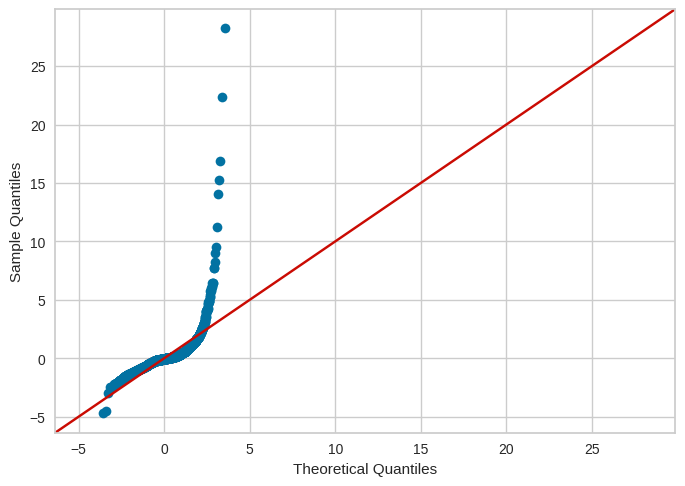

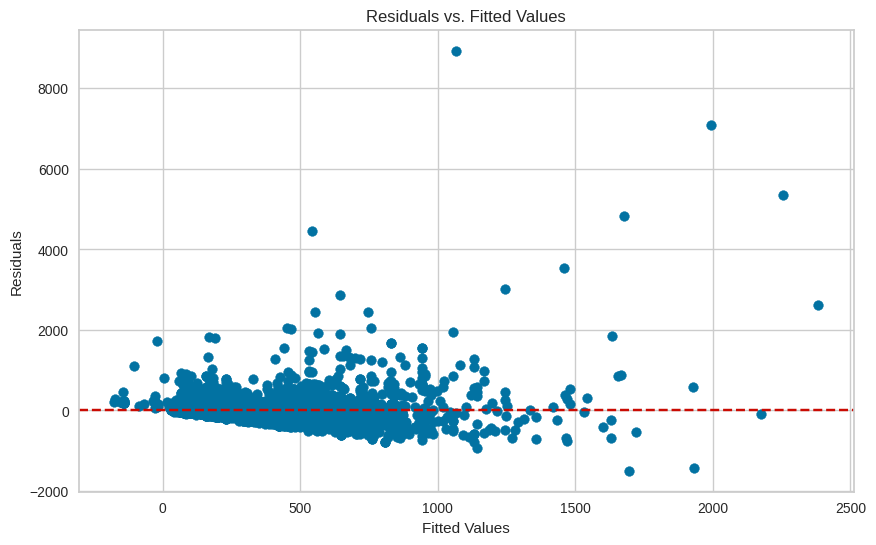

In [16]:
# Calculate residuals
residuals = linear_reg.resid #regression object created used again
                          #.resid is the key word

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45') #line puts diagonal on the plot
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(linear_reg.fittedvalues, residuals) #creates scatterplot / stepreg is the model object and we are pulling the fitted values out  the model
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [17]:
#Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included']]

#Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['room_type'], drop_first=True, dtype='float')

# Add constant for intercept in regression model
X = sm.add_constant(X)

#Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

#Apply log transformation to y (log(y + 1) to handle zero values)
logy = np.log(y + 1)

# Perform the OLS regression (Linear Regression with dummy variables and log-transformed y)
logreg = sm.OLS(logy, X).fit()

#Display the regression summary
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:41   Log-Likelihood:                -5403.8
No. Observations:                5781   AIC:                         1.082e+04
Df Residuals:                    5774   BIC:                         1.087e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

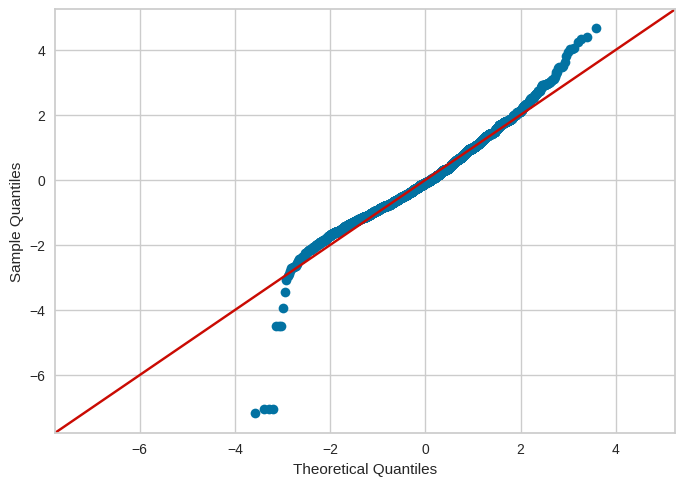

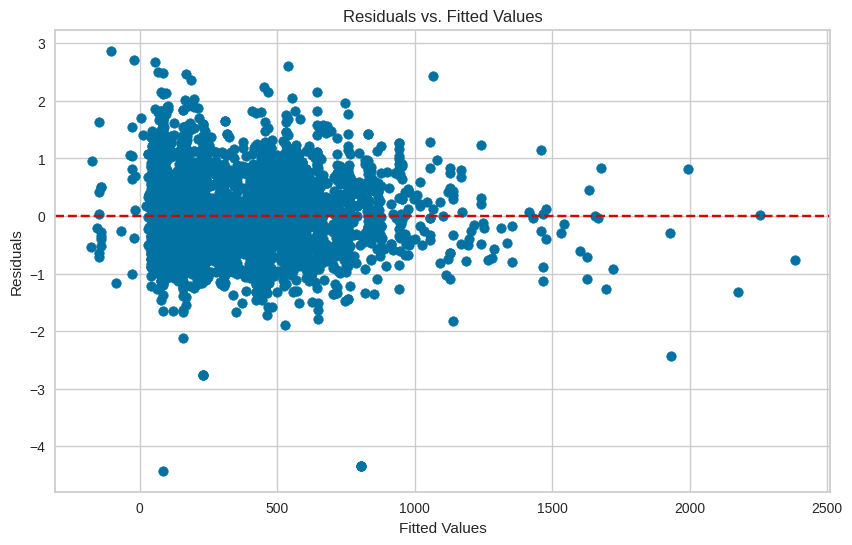

In [18]:
# Calculate residuals
residuals = logreg.resid #regression object created used again
                          #.resid is the key word

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45') #line puts diagonal on the plot
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(linear_reg.fittedvalues, residuals) #creates scatterplot / stepreg is the model object and we are pulling the fitted values out  the model
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

## Log Predicted Values Converted Back to Scale


In [22]:
# Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included']]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['room_type'], drop_first=True, dtype='float')

# Add constant for intercept in regression model
X = sm.add_constant(X)

# Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

# Apply log transformation to y (log(y + 1) to handle zero values)
logy = np.log(y + 1)

# Perform the OLS regression (Linear Regression with dummy variables and log-transformed y)
logreg = sm.OLS(logy, X).fit()

# Display the regression summary
print(logreg.summary())

# Get the predicted values in the log scale
logy_pred = logreg.predict(X)

# Convert the predicted values back to the original scale (price)
y_pred = np.exp(logy_pred) - 1  # Subtract 1 to reverse the log(y + 1) transformation

# Display the predicted prices in the original scale
print("Predicted prices (original scale):", y_pred)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:03:05   Log-Likelihood:                -5403.8
No. Observations:                5781   AIC:                         1.082e+04
Df Residuals:                    5774   BIC:                         1.087e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

# Square Root Transformation


In [23]:
#Handle missing values in 'price' and independent variables
airbnbUnclean1 = airbnbUnclean1.dropna(subset=['price', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included'])

# Define independent variables (X) and dependent variable (y)
X = airbnbUnclean1[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'guests_included']]

#  Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['room_type'], drop_first=True, dtype='float')

#Add constant for intercept in regression model
X = sm.add_constant(X)

#Define dependent variable (y) as 'price'
y = airbnbUnclean1['price']

#Apply square root transformation to y
sqrt_y = np.sqrt(y)

# Perform the OLS regression (Linear Regression with dummy variables and square root-transformed y)
sqrt_reg = sm.OLS(sqrt_y, X).fit()

#Display the regression summary
print(sqrt_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:03:45   Log-Likelihood:                -17959.
No. Observations:                5781   AIC:                         3.593e+04
Df Residuals:                    5774   BIC:                         3.598e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7

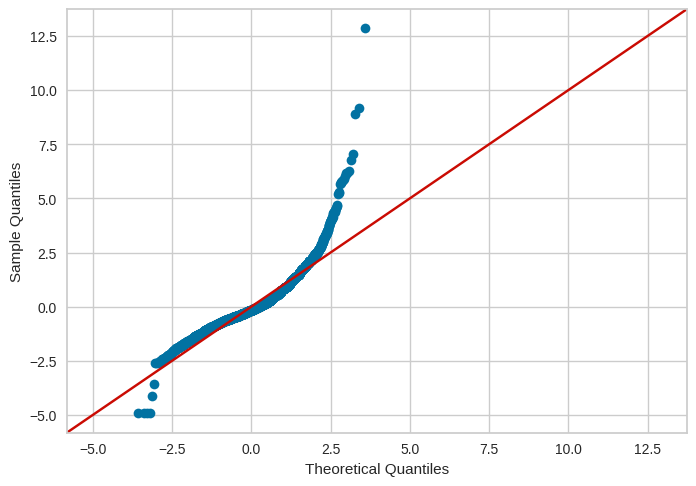

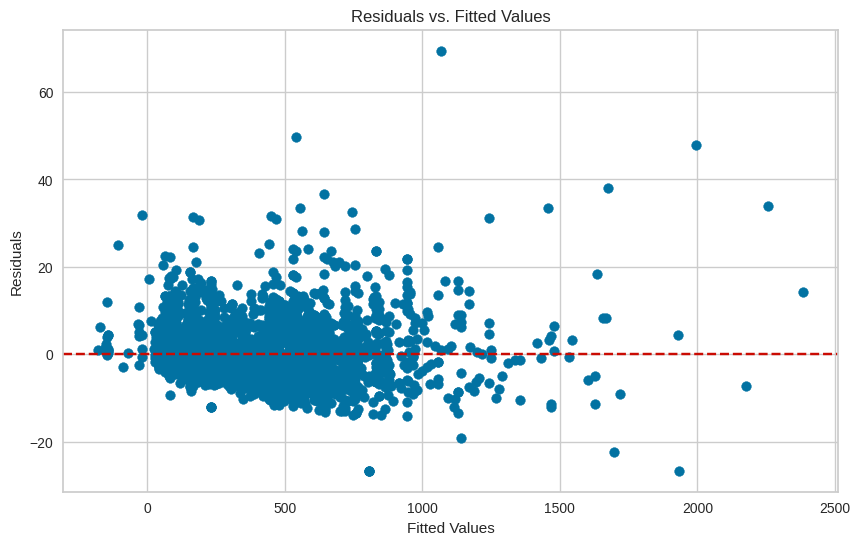

In [20]:
# Calculate residuals
residuals = sqrt_reg.resid #regression object created used again
                          #.resid is the key word

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45') #line puts diagonal on the plot
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(linear_reg.fittedvalues, residuals) #creates scatterplot / stepreg is the model object and we are pulling the fitted values out  the model
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()